$\textbf{Beta Contribution}$

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tabulate

In [2]:
# --------------------- Parameters ---------------------
tickers = ["AAPL", "MSFT", "AMZN", "GOOG", "META", "TSLA", "NVDA"] # Magnificent 7
spy_ticker = "SPY"
start_date = "2020-04-01"
end_date = "2024-12-29"
file="6sig.xlsx"

In [3]:
# --------------------- Data Download ---------------------
data=pd.read_excel("6sig.xlsx",sheet_name="Price_Cap")
data["Dates"]=pd.to_datetime(data["Dates"])
data.set_index('Dates',inplace=True)
data.head()
# data.info()

for ticker in tickers+['SPX']:
  # data[ticker+"_Ret"]=np.log(data[ticker+'_PX_LAST']).diff(1)
  data[ticker+"_Ret"]=data[ticker+'_PX_LAST'].pct_change()

for ticker in tickers:
  data[ticker+"_Weights"]=data[ticker+"_CUR_MKT_CAP"]/data["SPX_CUR_MKT_CAP"]

'''
for ticker in tickers:
  data[ticker+"_Weighted_Ret"]=data[ticker+'_Weights']*data[ticker+"_Weights"]
'''

data.dropna(how='any',inplace=True)
print(data.head())
print(data.keys())

            AAPL_PX_LAST  AMZN_PX_LAST  TSLA_PX_LAST  GOOG_PX_LAST  \
Dates                                                                
2020-01-03        74.358        93.749       29.5340     68.053032   
2020-01-06        74.950        95.144       30.1027     69.794854   
2020-01-07        74.598        95.343       31.2707     69.708461   
2020-01-08        75.798        94.599       32.8093     70.232771   
2020-01-09        77.408        95.053       32.0893     70.990602   

            META_PX_LAST  NVDA_PX_LAST  MSFT_PX_LAST  SPX_PX_LAST  \
Dates                                                               
2020-01-03        208.67        5.9018        158.62      3234.85   
2020-01-06        212.60        5.9265        159.03      3246.28   
2020-01-07        213.06        5.9983        157.58      3237.18   
2020-01-08        215.22        6.0095        160.09      3253.05   
2020-01-09        218.30        6.0755        162.09      3274.70   

            AAPL_EQY_SH_O

In [4]:
giant_returns=data.loc[:,data.columns.str.contains("Ret")]
#exclude SPX
giant_returns.drop(columns=["SPX_Ret"],inplace=True)
spx_returns=data['SPX_Ret']

'''
giant_weighted_returns=data.loc[:,data.columns.str.contains("_Weighted_Ret")]
giant_weighted_returns.head()
'''

giant_returns.head()

<ipython-input-4-6e0a70274cf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giant_returns.drop(columns=["SPX_Ret"],inplace=True)


,AAPL_Ret,MSFT_Ret,AMZN_Ret,GOOG_Ret,META_Ret,TSLA_Ret,NVDA_Ret
Dates,,,,,,,
2020-01-03,-0.009722,-0.012452,-0.012139,-0.005062,-0.005291,0.029633,-0.016006
2020-01-06,0.007961,0.002585,0.014880,0.025595,0.018834,0.019256,0.004185
2020-01-07,-0.004696,-0.009118,0.002092,-0.001238,0.002164,0.038801,0.012115
2020-01-08,0.016086,0.015928,-0.007803,0.007521,0.010138,0.049203,0.001867
2020-01-09,0.021241,0.012493,0.004799,0.010790,0.014311,-0.021945,0.010983


In [5]:
# --------------------- Rolling Beta Calculation ---------------------
def calculate_rolling_beta(stock_returns, market_returns, window):
    return stock_returns.rolling(window).cov(market_returns) / market_returns.rolling(window).var()

rolling_window = 60  # 60 days/1-year window
rolling_betas = {ticker: calculate_rolling_beta(giant_returns[ticker+'_Ret'], spx_returns, rolling_window) for ticker in tickers}
rolling_betas_df = pd.DataFrame(rolling_betas)

rolling_betas_df.dropna(how='any',inplace=True)
rolling_betas_df

,AAPL,MSFT,AMZN,GOOG,META,TSLA,NVDA
Dates,,,,,,,
2020-03-30,1.105858,1.161291,0.603264,0.889419,0.935710,1.111036,1.344821
2020-03-31,1.103331,1.161096,0.602780,0.884881,0.932408,1.103806,1.342986
2020-04-01,1.105920,1.155961,0.600792,0.888860,0.931908,1.124039,1.356848
2020-04-02,1.102654,1.152658,0.597310,0.886646,0.922197,1.094378,1.360956
2020-04-03,1.101532,1.151563,0.598727,0.887386,0.922941,1.080959,1.366755
...,...,...,...,...,...,...,...
2025-02-06,0.697873,1.122151,1.422428,1.287940,1.054034,2.671454,2.775255
2025-02-07,0.747734,1.140628,1.511294,1.359263,1.037394,2.636879,2.694285
2025-02-10,0.733141,1.140998,1.523721,1.364405,1.021837,2.566491,2.721930


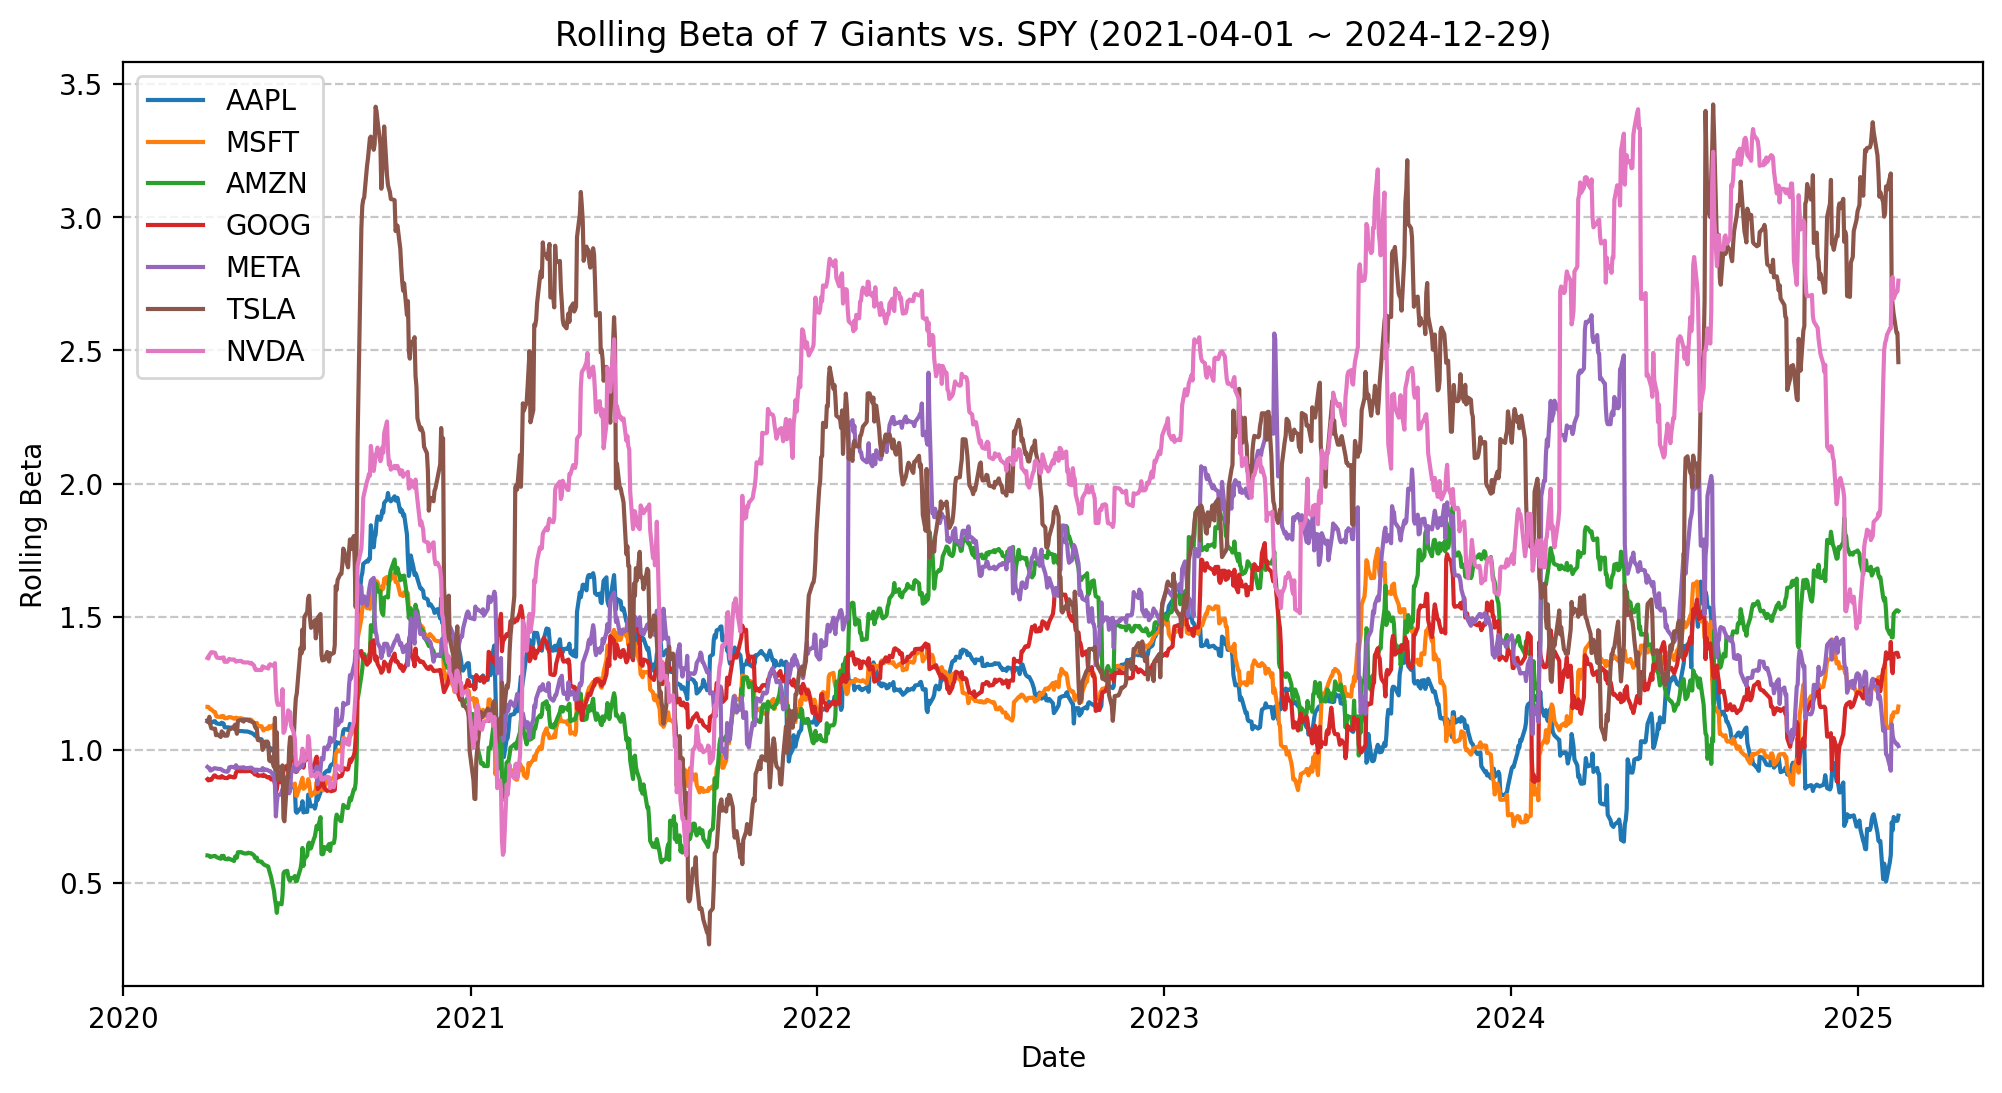

In [9]:
# --------------------- Plot 1.1: Individual Weighted Betas ---------------------
plt.figure(figsize=(12, 6),dpi=200)
plt.plot(rolling_betas_df.index, rolling_betas_df)
plt.title("Rolling Beta of 7 Giants vs. SPY (2021-04-01 ~ 2024-12-29)")
plt.xlabel("Date")
plt.ylabel("Rolling Beta")
plt.legend(rolling_betas_df.keys())
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [10]:
data_merged=pd.merge(left=rolling_betas_df,right=data,how='left',left_index=True,right_index=True)
for ticker in tickers:
  data_merged['Weighted_'+ticker]=data_merged[ticker+'_Weights']*data_merged[ticker]
data_merged.head()

,AAPL,MSFT,AMZN,GOOG,META,TSLA,NVDA,AAPL_PX_LAST,AMZN_PX_LAST,TSLA_PX_LAST,...,META_Weights,TSLA_Weights,NVDA_Weights,Weighted_AAPL,Weighted_MSFT,Weighted_AMZN,Weighted_GOOG,Weighted_META,Weighted_TSLA,Weighted_NVDA
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-30,1.105858,1.161291,0.603264,0.889419,0.935710,1.111036,1.344821,63.703,98.198,33.4753,...,0.020890,0.004083,0.007184,0.054449,0.062502,0.026047,0.030953,0.019547,0.004536,0.009661
2020-03-31,1.103331,1.161096,0.602780,0.884881,0.932408,1.103806,1.342986,63.573,97.486,34.9333,...,0.021341,0.004330,0.007247,0.055101,0.062515,0.026260,0.031730,0.019898,0.004780,0.009732
2020-04-01,1.105920,1.155961,0.600792,0.888860,0.931908,1.124039,1.356848,60.228,95.385,32.1040,...,0.021319,0.004155,0.006977,0.054630,0.062674,0.026740,0.031605,0.019868,0.004670,0.009466
2020-04-02,1.102654,1.152658,0.597310,0.886646,0.922197,1.094378,1.360956,61.233,95.941,30.2980,...,0.020666,0.003835,0.007171,0.054159,0.062385,0.026152,0.031254,0.019058,0.004197,0.009760
2020-04-03,1.101532,1.151563,0.598727,0.887386,0.922941,1.080959,1.366755,60.353,95.330,32.0007,...,0.020415,0.004105,0.006940,0.054049,0.062589,0.026400,0.031035,0.018842,0.004438,0.009485


In [11]:
weighted_beta=data_merged.loc[:,data_merged.columns.str.contains("Weighted_")]
weighted_beta=weighted_beta.loc['2020-04-01':'2024-12-29']
weighted_beta.head()

,Weighted_AAPL,Weighted_MSFT,Weighted_AMZN,Weighted_GOOG,Weighted_META,Weighted_TSLA,Weighted_NVDA
Dates,,,,,,,
2020-04-01,0.054630,0.062674,0.026740,0.031605,0.019868,0.004670,0.009466
2020-04-02,0.054159,0.062385,0.026152,0.031254,0.019058,0.004197,0.009760
2020-04-03,0.054049,0.062589,0.026400,0.031035,0.018842,0.004438,0.009485
2020-04-06,0.055302,0.062423,0.026006,0.032004,0.019095,0.004459,0.009758
2020-04-07,0.054754,0.061853,0.026238,0.032049,0.019514,0.004722,0.009431


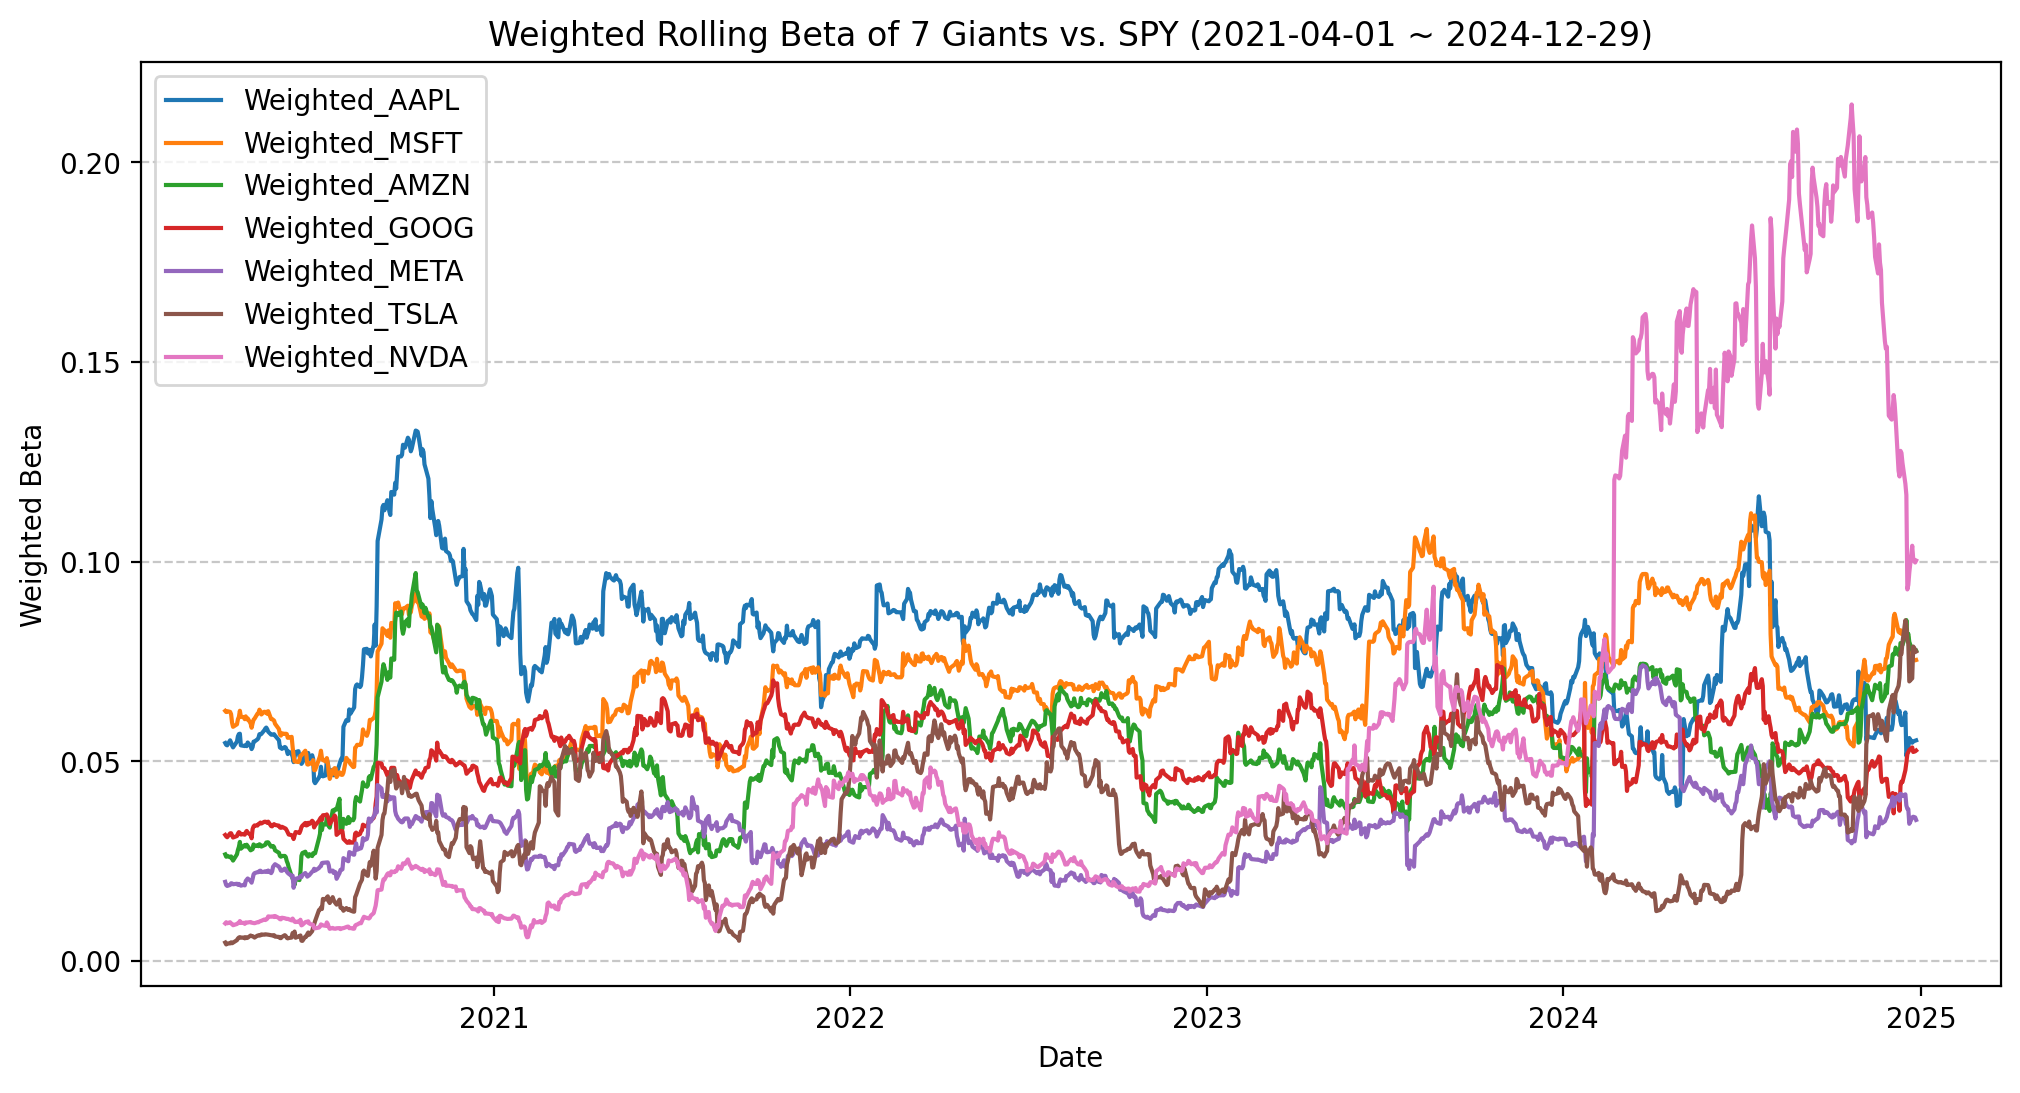

In [12]:
# --------------------- Plot 1: Individual Weighted Betas ---------------------
plt.figure(figsize=(12,6),dpi=200)
plt.plot(weighted_beta.index, weighted_beta)
plt.title("Weighted Rolling Beta of 7 Giants vs. SPY (2021-04-01 ~ 2024-12-29)")
plt.xlabel("Date")
plt.ylabel("Weighted Beta")
plt.legend(weighted_beta.keys())
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [14]:
# --------------------- Compute Total Beta & Remaining Market Beta ---------------------
first_valid_date = weighted_beta.dropna(how="all").index[0]  # First valid date for all stocks
total_weighted_beta = weighted_beta.loc[first_valid_date:].sum(axis=1)  # Sum across 7 giants
remaining_beta = 1 - total_weighted_beta  # Beta contribution of remaining 493 stocks

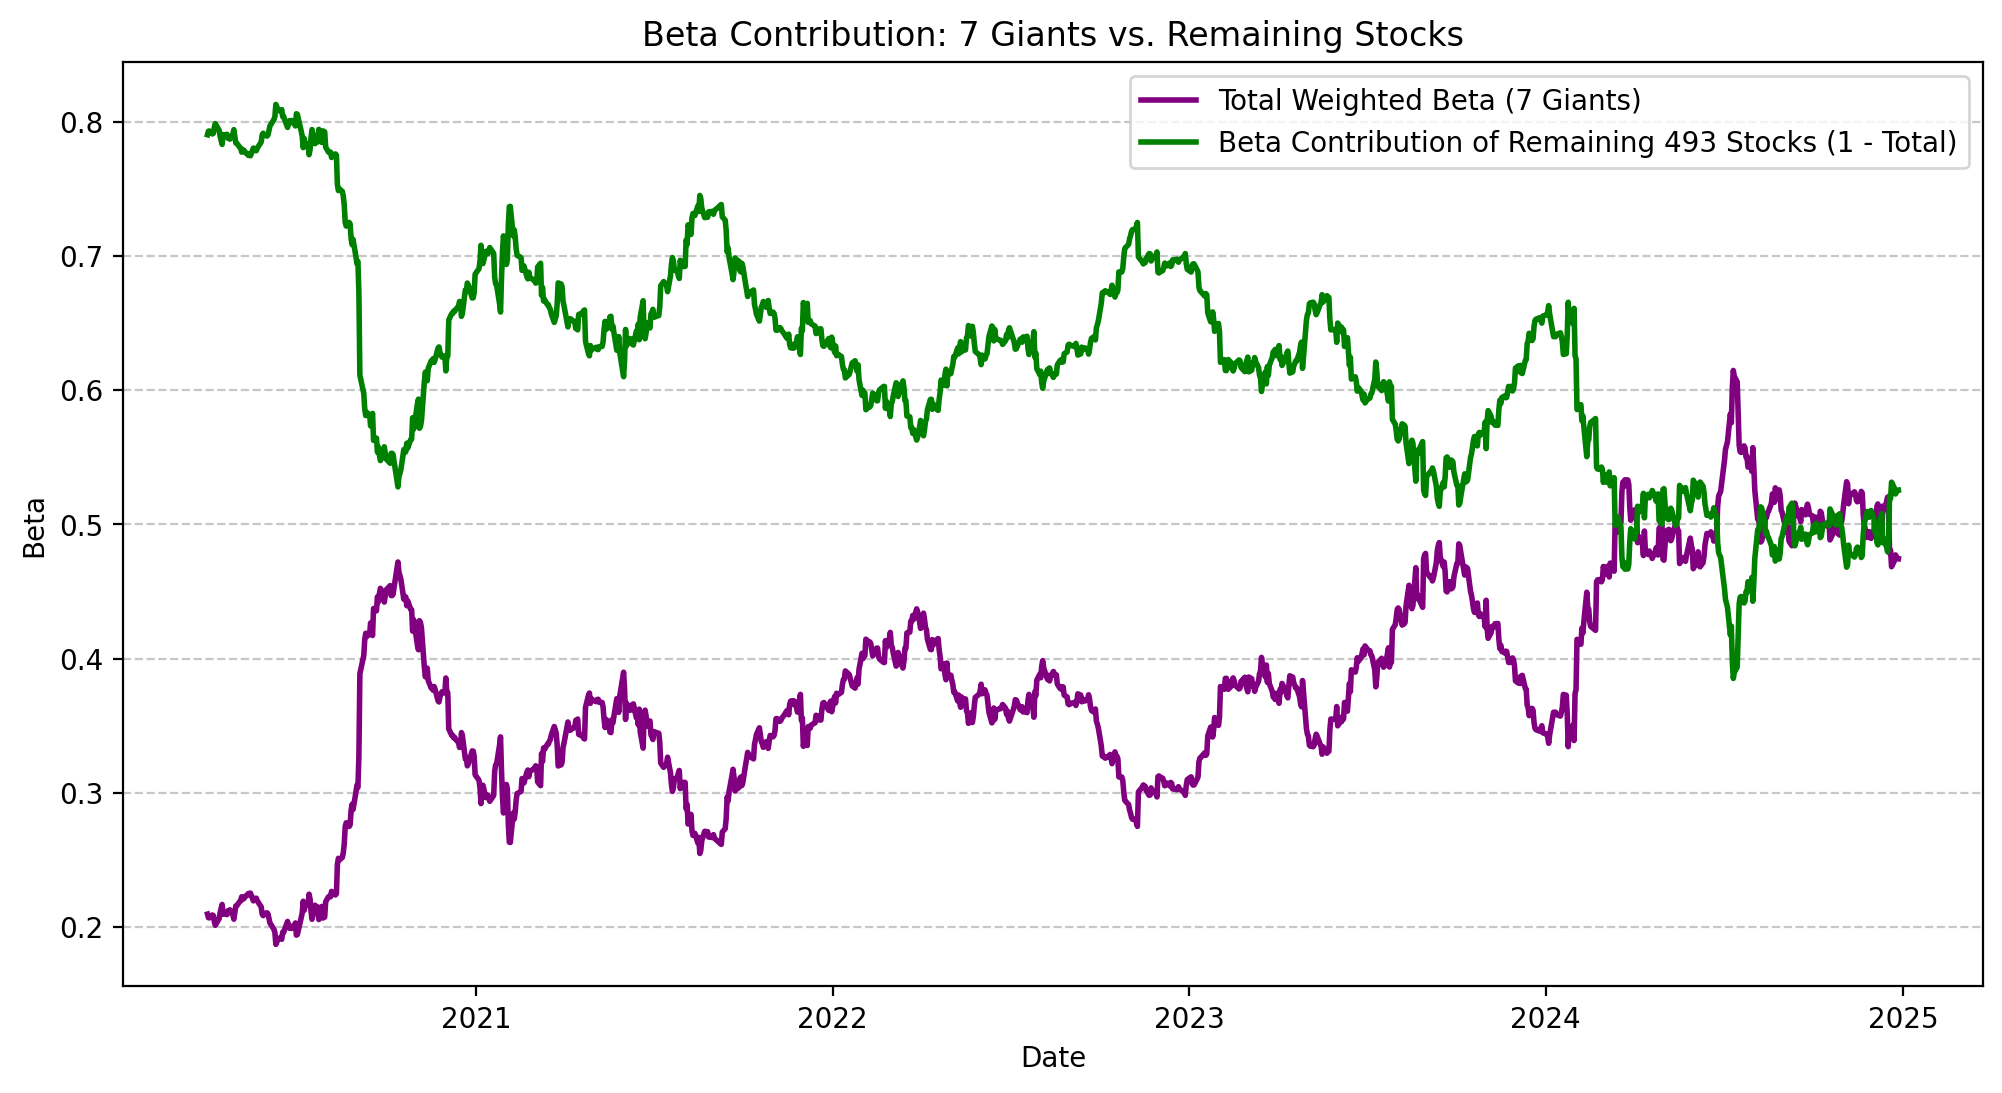

Last available beta date: 2024-12-27


In [15]:
# --------------------- Plot 2: Total Beta vs. Remaining Beta ---------------------
plt.figure(figsize=(12, 6),dpi=200)
plt.plot(total_weighted_beta.index, total_weighted_beta, color="purple", linewidth=2,
         label="Total Weighted Beta (7 Giants)")
plt.plot(remaining_beta.index, remaining_beta, color="green", linewidth=2,
         label="Beta Contribution of Remaining 493 Stocks (1 - Total)")
plt.title("Beta Contribution: 7 Giants vs. Remaining Stocks")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --------------------- Print Last Available Beta Date ---------------------
valid_betas = weighted_beta.dropna(how="all")
if not valid_betas.empty:
    last_date = valid_betas.index[-1].strftime("%Y-%m-%d")
    print(f"Last available beta date: {last_date}")
else:
    print("No valid beta data available.")

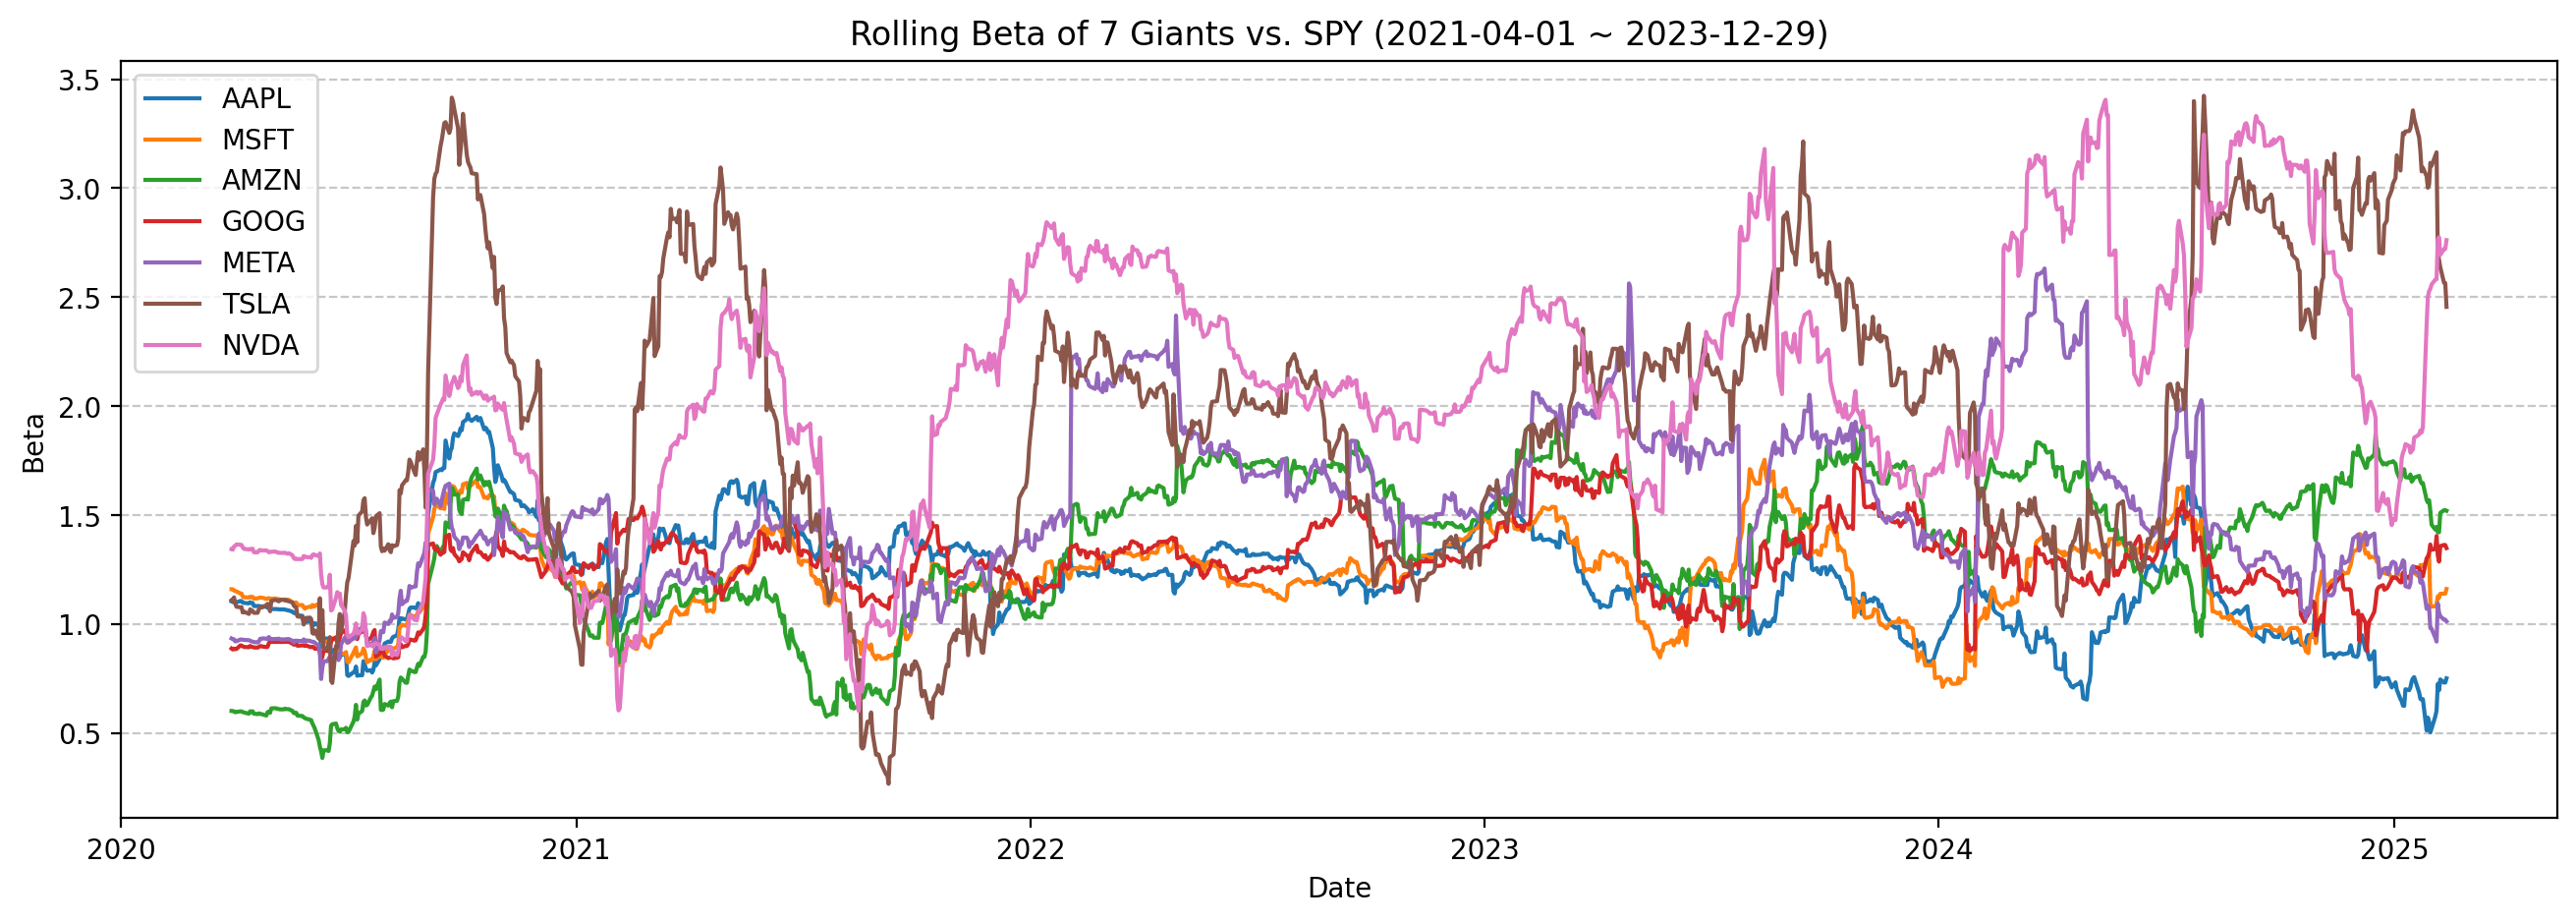

In [ ]:
plt.figure(figsize=(16, 5),dpi=200)
for ticker in tickers:
    plt.plot(rolling_betas_df.index, rolling_betas_df[ticker], label=f"{ticker}")
plt.title("Rolling Beta of 7 Giants vs. SPY (2021-04-01 ~ 2023-12-29)")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
#the data including return
data.to_csv('data.csv')

#weighted beta
weighted_beta['Sum']=weighted_beta.sum(axis=1)
weighted_beta.dropna(how='any').describe().to_csv('weighted_betas_stats.csv')

$\textbf{Cholesky decomposition and rotation}$

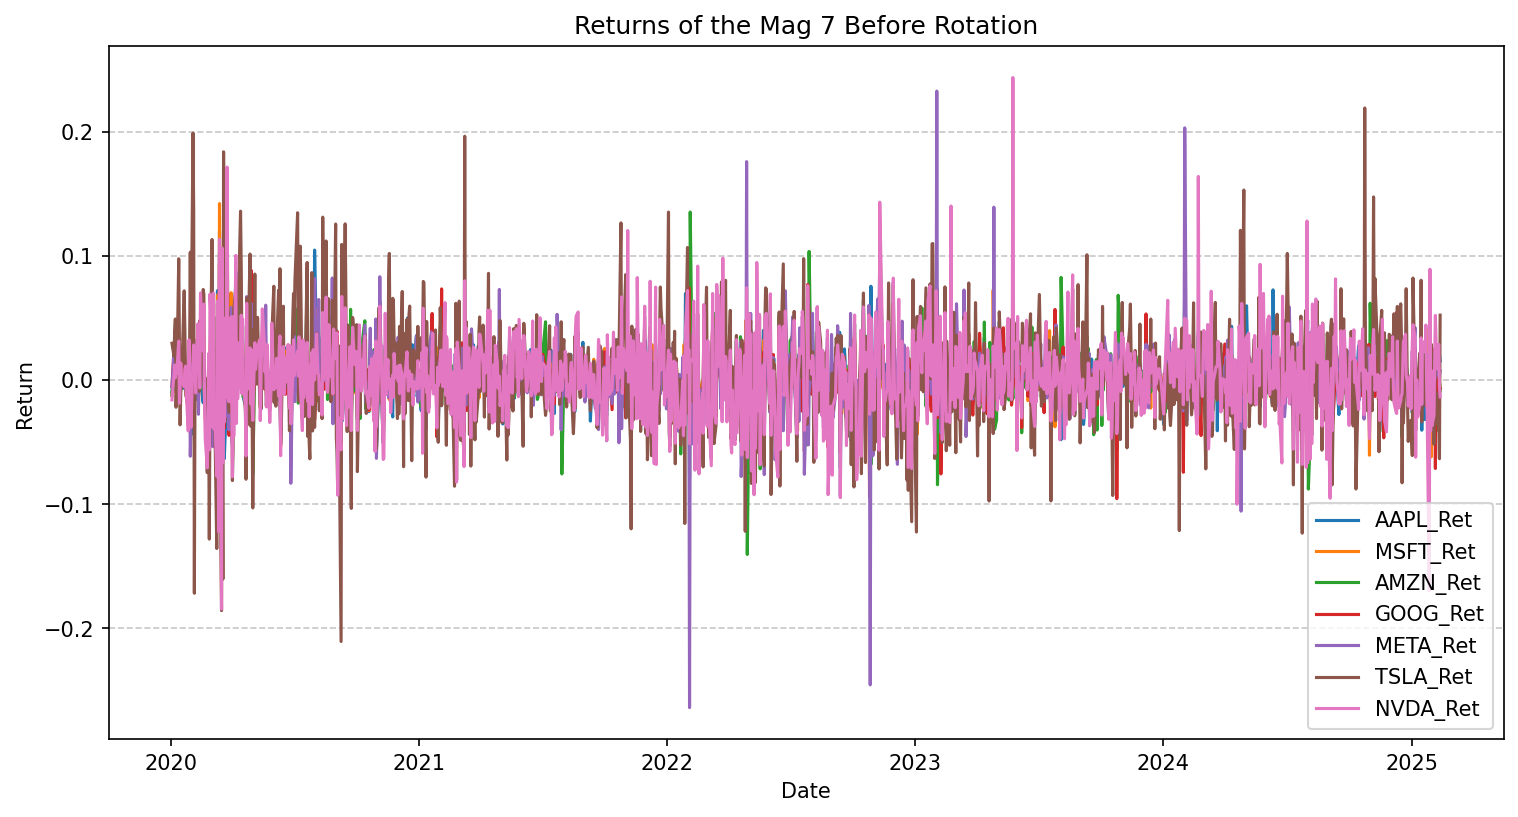

In [16]:
#plot giant returns
plt.figure(figsize=(12, 6),dpi=150)
plt.plot(giant_returns.index, giant_returns)
plt.title("Returns of the Mag 7 Before Rotation")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend(giant_returns.keys())
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
#stationary test of 7 stocks

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

for ticker in tickers:
  result = adfuller(giant_returns[ticker+'_Ret'])
  print(ticker)
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')

  # print('Critical Values:')
  # for key, value in result[4].items():
  #     print(f'   {key}: {value}')

AAPL
ADF Statistic: -11.568471030515008
p-value: 3.144077050457492e-21
MSFT
ADF Statistic: -8.497758486292835
p-value: 1.262296911013278e-13
AMZN
ADF Statistic: -36.98485197708731
p-value: 0.0
GOOG
ADF Statistic: -11.58091610890358
p-value: 2.9444407214827756e-21
META
ADF Statistic: -37.407860215965194
p-value: 0.0
TSLA
ADF Statistic: -15.769449238121577
p-value: 1.1657433199763706e-28
NVDA
ADF Statistic: -11.095170456870331
p-value: 3.990579827083615e-20


In [17]:
import numpy as np
np.set_printoptions(linewidth=200)


#use the weighted returns
corr_matrix=giant_returns.corr()
corr_matrix.to_csv('corr_matrix_original.csv')
L = np.linalg.cholesky(corr_matrix)
print(L)

[[ 1.          0.          0.          0.          0.          0.          0.        ]
 [ 0.74109223  0.67140323  0.          0.          0.          0.          0.        ]
 [ 0.58690063  0.35906825  0.72568426  0.          0.          0.          0.        ]
 [ 0.63860926  0.38729959  0.18659384  0.63824759  0.          0.          0.        ]
 [ 0.5583369   0.29924209  0.23888115  0.18792056  0.71157272  0.          0.        ]
 [ 0.48318009  0.12753381  0.14369364  0.02800603 -0.02448822  0.85336994  0.        ]
 [ 0.59067889  0.35615884  0.13522326  0.07088194  0.06470943  0.12951599  0.69280449]]


In [18]:
#（optional) use weighted return
#now it should be uncorrelated
returns_rotate= np.linalg.inv(L) @ giant_returns.T
returns_rotate = returns_rotate.T
corr_after_rotation=pd.DataFrame(returns_rotate).corr()
corr_after_rotation.to_csv('corr_after_rotation.csv')
print(corr_after_rotation)

          0         1         2         3         4         5         6
0  1.000000 -0.039115  0.109759  0.014819  0.201580  0.281723  0.256065
1 -0.039115  1.000000  0.067622  0.013318  0.099537  0.062068  0.169625
2  0.109759  0.067622  1.000000 -0.026332  0.099473  0.112091  0.083117
3  0.014819  0.013318 -0.026332  1.000000  0.071962  0.020353  0.034917
4  0.201580  0.099537  0.099473  0.071962  1.000000  0.062415  0.093448
5  0.281723  0.062068  0.112091  0.020353  0.062415  1.000000  0.050155
6  0.256065  0.169625  0.083117  0.034917  0.093448  0.050155  1.000000


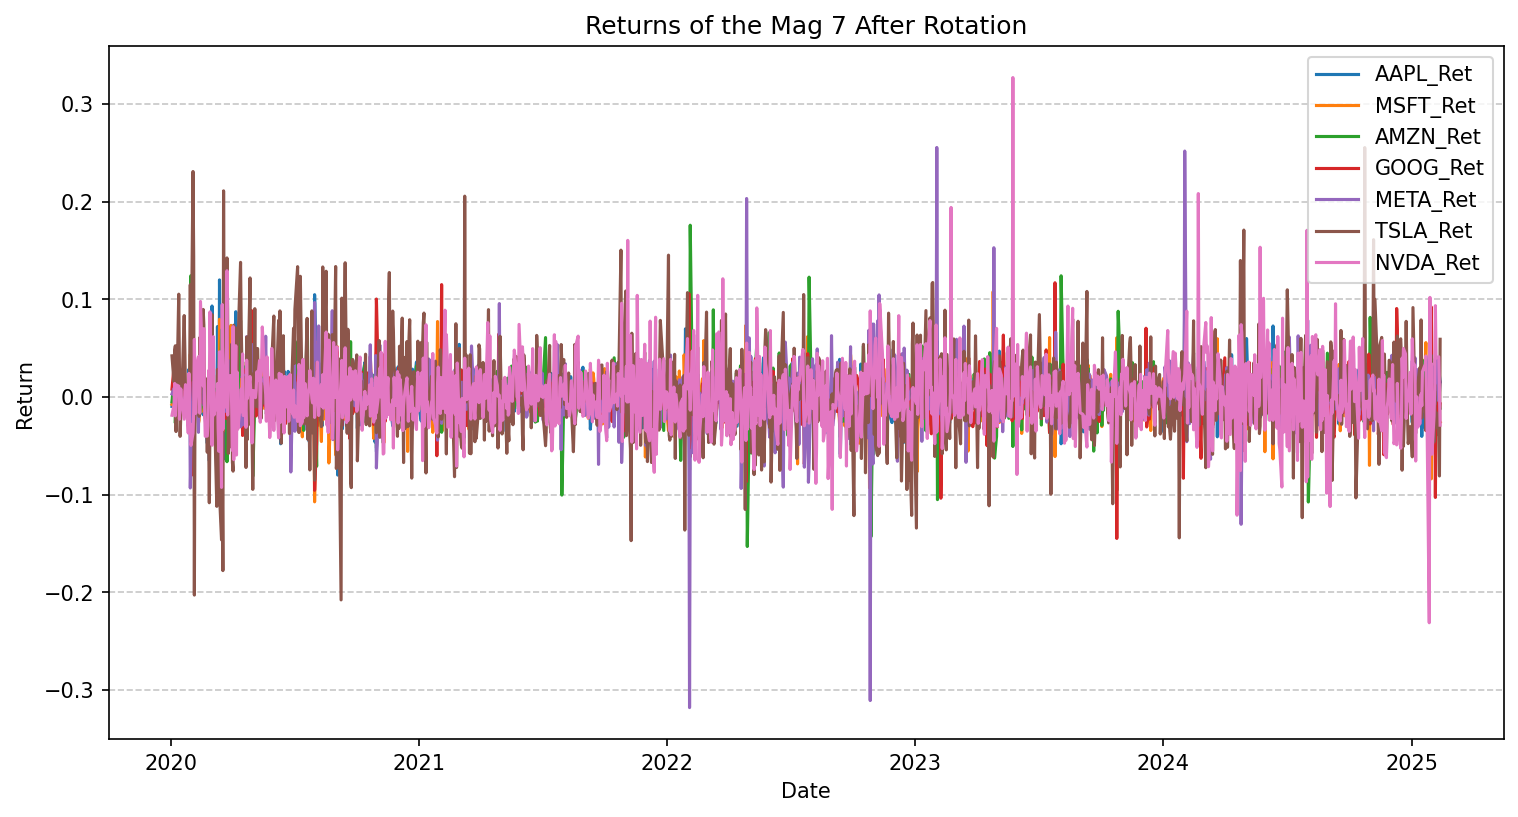

In [23]:
#use weigthed returns
returns_rotate.columns=giant_returns.columns

#plot giant returns
plt.figure(figsize=(12, 6),dpi=150)
plt.plot(returns_rotate.index, returns_rotate)
plt.title("Returns of the Mag 7 After Rotation")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend(returns_rotate.keys())
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
returns_rotate=returns_rotate.loc['2020-04-01':'2024-12-29']
spx_returns_new=data['SPX_Ret'].loc['2020-04-01':'2024-12-29']
print(returns_rotate.shape,spx_returns_new.shape)

(1185, 7) (1185,)


In [ ]:
import statsmodels.api as sm
from tabulate import tabulate

#linear regression using eliminated interdependence
model_1=sm.OLS(spx_returns_new,sm.add_constant(returns_rotate)).fit()
results_summary_1=model_1.summary()
print(results_summary_1)

#print three-way table
# results_as_html = results_summary_1.tables[1].as_html()
# results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
# results_df.to_excel('regression_results.xlsx', index=True)
results_summary_1

                            OLS Regression Results                            
Dep. Variable:                SPX_Ret   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     503.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:37:00   Log-Likelihood:                 4468.0
No. Observations:                1185   AIC:                            -8920.
Df Residuals:                    1177   BIC:                            -8879.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.277e-05      0.000     -0.262      0.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                SPX_Ret   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     503.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:37:00   Log-Likelihood:                 4468.0
No. Observations:                1185   AIC:                            -8920.
Df Residuals:                    1177   BIC:                            -8879.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.277e-05      0.000     -0.262      0.794      -0.000       0.000
AAPL_Ret       0.4181      0.010     41.383      0.000       0.398       0.438
MSFT_Ret       0.1853      0.009     20.270      0.000       0.167       0.203
AMZN_Ret       0.0614      0.007      8.252      0.000       0.047       0.076
GOOG_Ret       0.0822      0.008     10.207      0.000       0.066       0.098
META_Ret       0.0225      0.006      3.954      0.000       0.011       0.034
TSLA_Ret       0.0287      0.004      7.021      0.000       0.021       0.037
NVDA_Ret       0.0392      0.005      8.112      0.000       0.030       0.049
==============================================================================
Omnibus:                       82.128   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              365.112
Skew:                           0.095   Prob(JB):                     5.21e-80
Kurtosis:                       5.713   Cond. No.                         67.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=[variance_inflation_factor(returns_rotate,i).round(3) for i in range(returns_rotate.shape[1])]
print(VIF)

[1.276, 1.081, 1.076, 1.009, 1.067, 1.111, 1.104]


In [ ]:
# benchmark model
model_2=sm.OLS(spx_returns_new,giant_returns['2020-04-01':'2024-12-29']).fit()
results_summary_2=model_2.summary()
results_summary_2
print(results_summary_2)

#print three-way table
# results_as_html = results_summary_1.tables[1].as_html()
# results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
# results_df.to_excel('regression_results.xlsx', index=True)

                                 OLS Regression Results                                
Dep. Variable:                SPX_Ret   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              507.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                        0.00
Time:                        19:37:05   Log-Likelihood:                          4468.0
No. Observations:                1185   AIC:                                     -8922.
Df Residuals:                    1178   BIC:                                     -8886.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
VIF_2=[variance_inflation_factor(giant_returns,i).round(3) for i in range(giant_returns.shape[1])]
print(VIF_2)

[2.528, 3.556, 2.267, 2.648, 2.0, 1.426, 2.092]


In [ ]:
# VARX Model (Vector Auto Regression)

$\text{Tesla Drawdown 2024 Effect}$

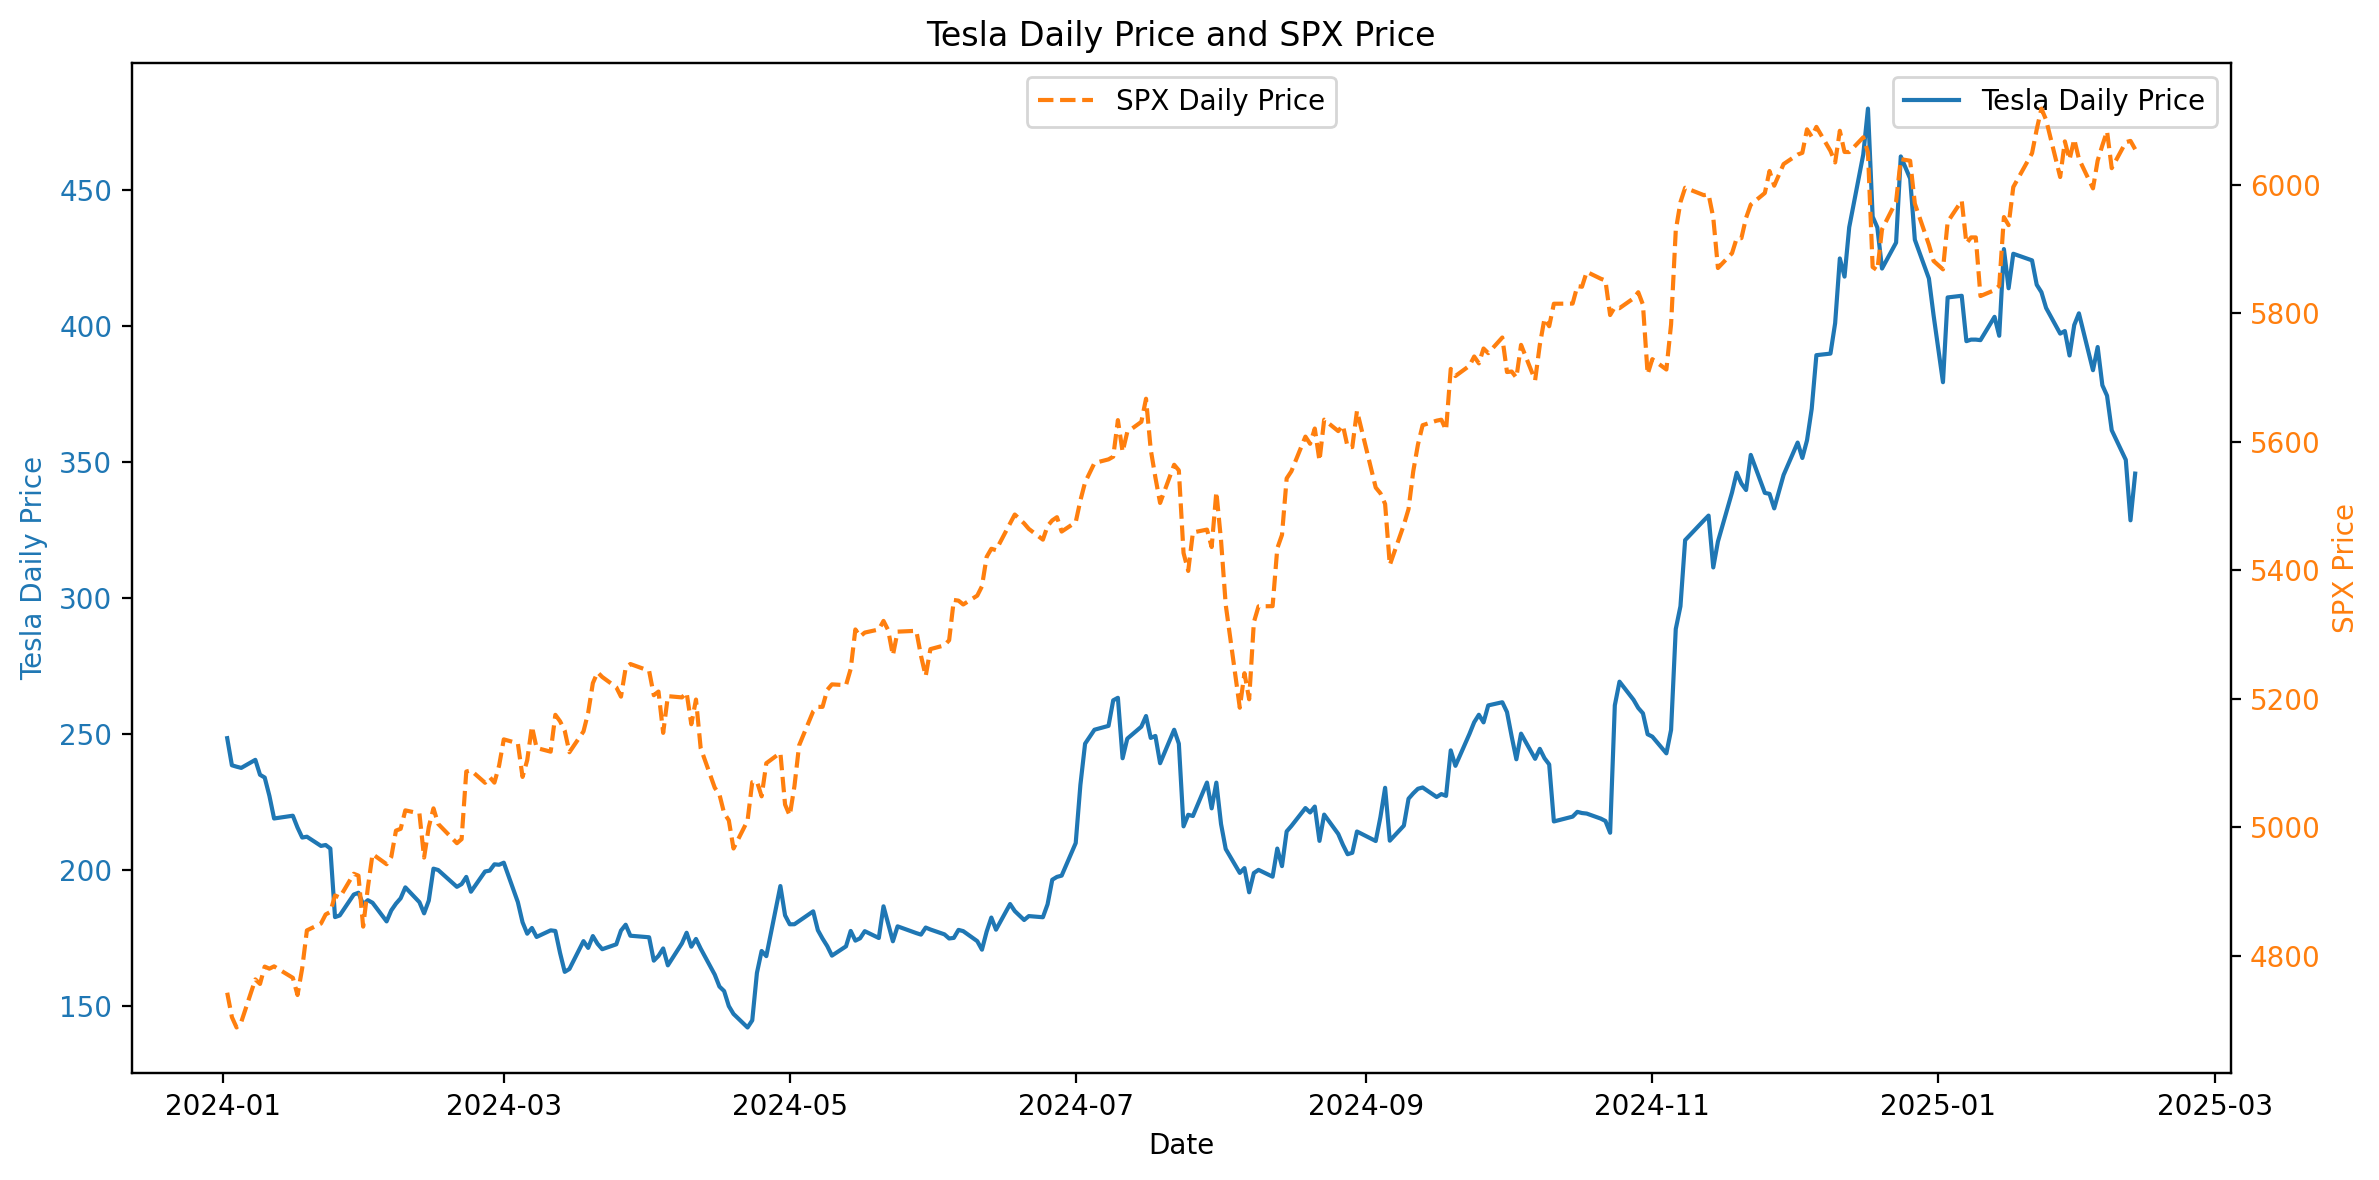

Tesla Max Drawdown: 42.82% happens during 2024-04-22 00:00:00


In [21]:
#Tesla Price and Beta on Different Axis

tsla_2024=data['TSLA_PX_LAST'].loc['2024-01-01':]

fig, ax1 = plt.subplots(figsize=(12, 6),dpi=200)

# Plot Tesla's Price on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Tesla Daily Price', color=color)
ax1.plot(tsla_2024.index, tsla_2024, color=color, label='Tesla Daily Price')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc='best')

# Create a secondary y-axis for Beta
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('SPX Price', color=color)

ax2.plot(tsla_2024.index, data['2024-01-01':]['SPX_PX_LAST'], color=color, label='SPX Daily Price', linestyle='--')
# ax2.plot(tsla_2024.index, rolling_betas_df['2024-01-01':]['TSLA'], color=color, label='Tesla Beta', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Tesla Daily Price and SPX Price')
fig.tight_layout()
plt.legend(loc='upper center')
plt.show()


tesla_drawdown = (tsla_2024.cummax() - tsla_2024) / tsla_2024.cummax()
max_drawdown = tesla_drawdown.max()
max_drawdown_date = tesla_drawdown.idxmax()

drawdown_start='2024-01-01'
drawdown_end=max_drawdown_date

print(f"Tesla Max Drawdown: {max_drawdown:.2%} happens during {max_drawdown_date}")

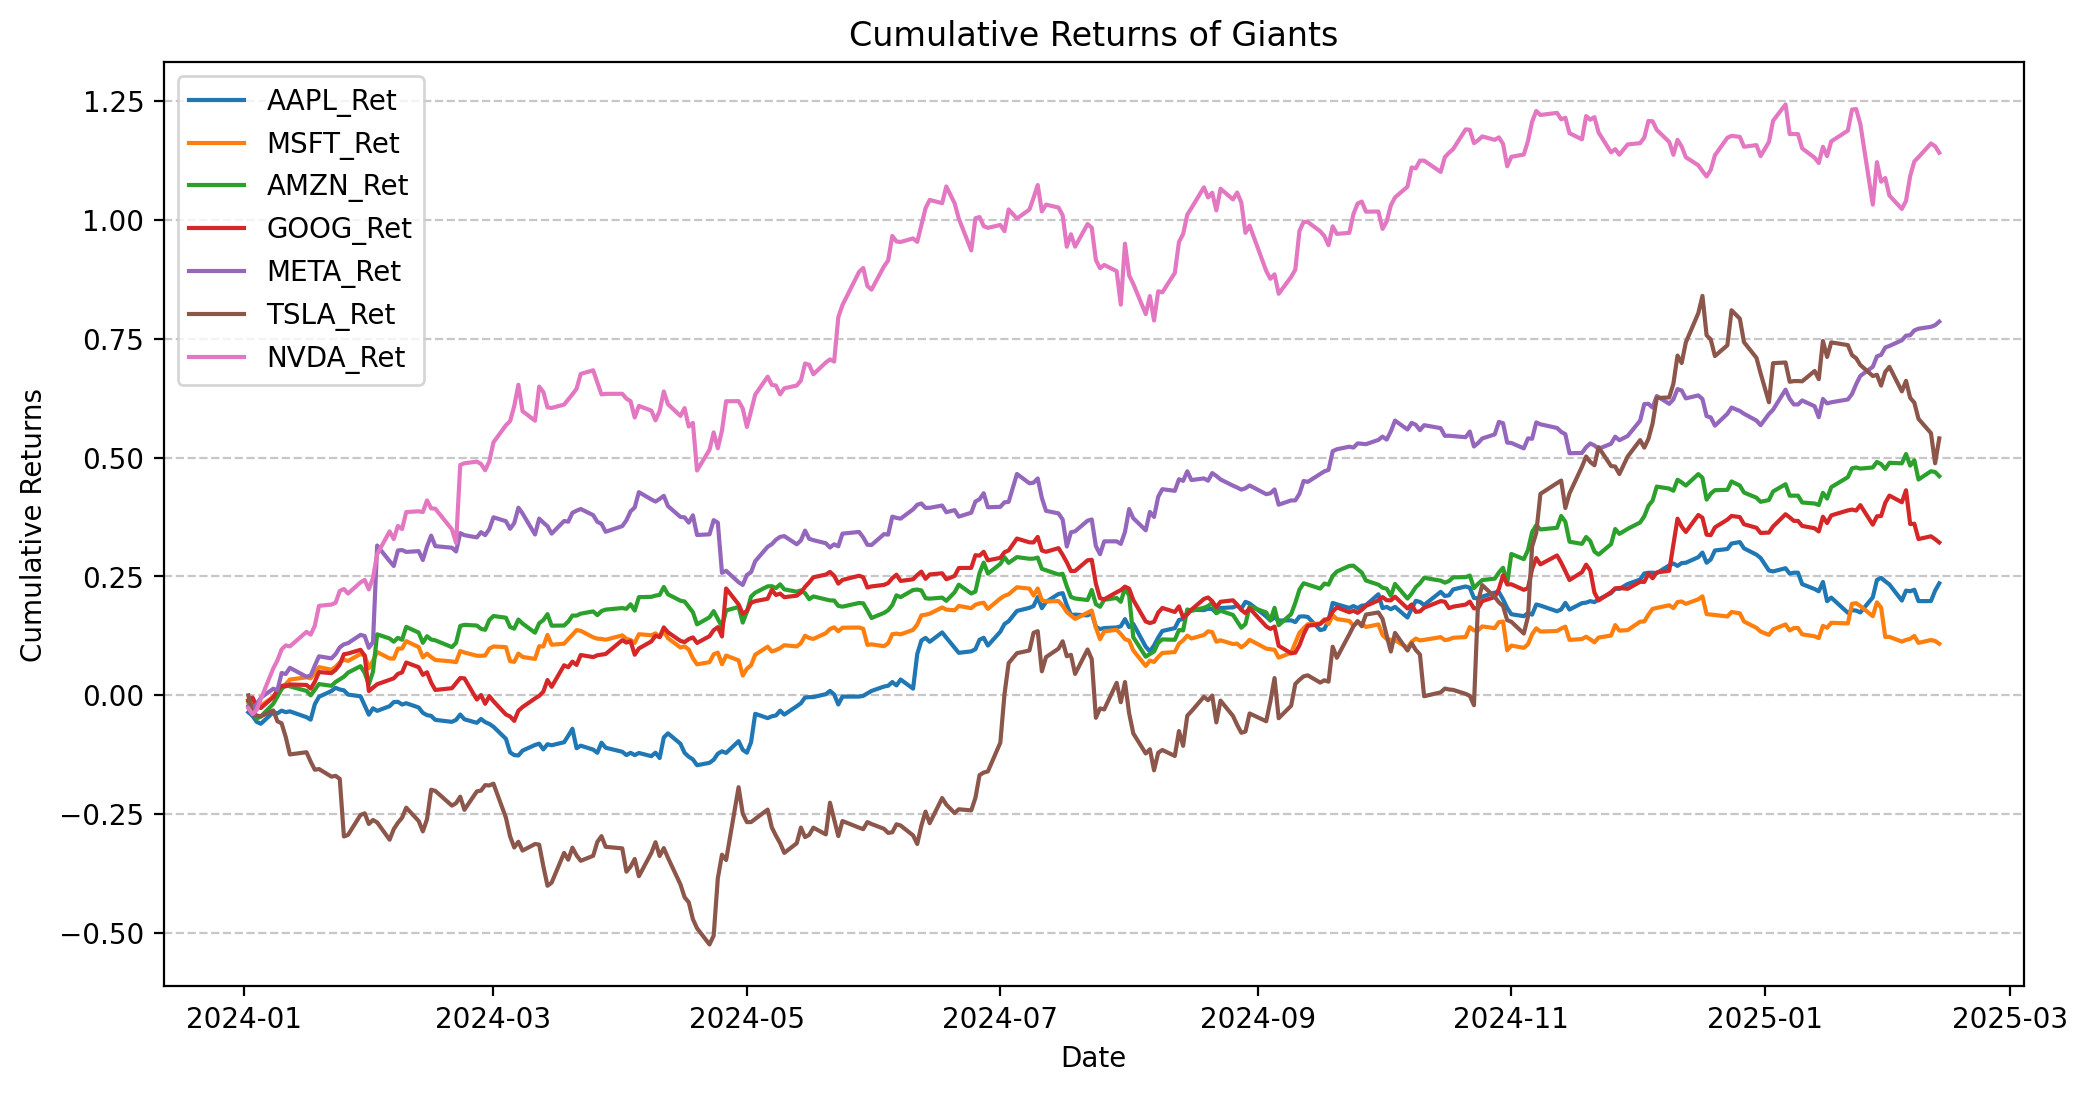

In [22]:
giant_returns_2024=giant_returns[giant_returns.index>='2024-01-01']
giant_returns_2024

plt.figure(figsize=(12, 6),dpi=200)
plt.plot(giant_returns_2024.index, giant_returns_2024.cumsum())
plt.title("Cumulative Returns of Giants")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(giant_returns_2024.keys())
plt.grid(axis="y", linestyle="--", alpha=0.7)

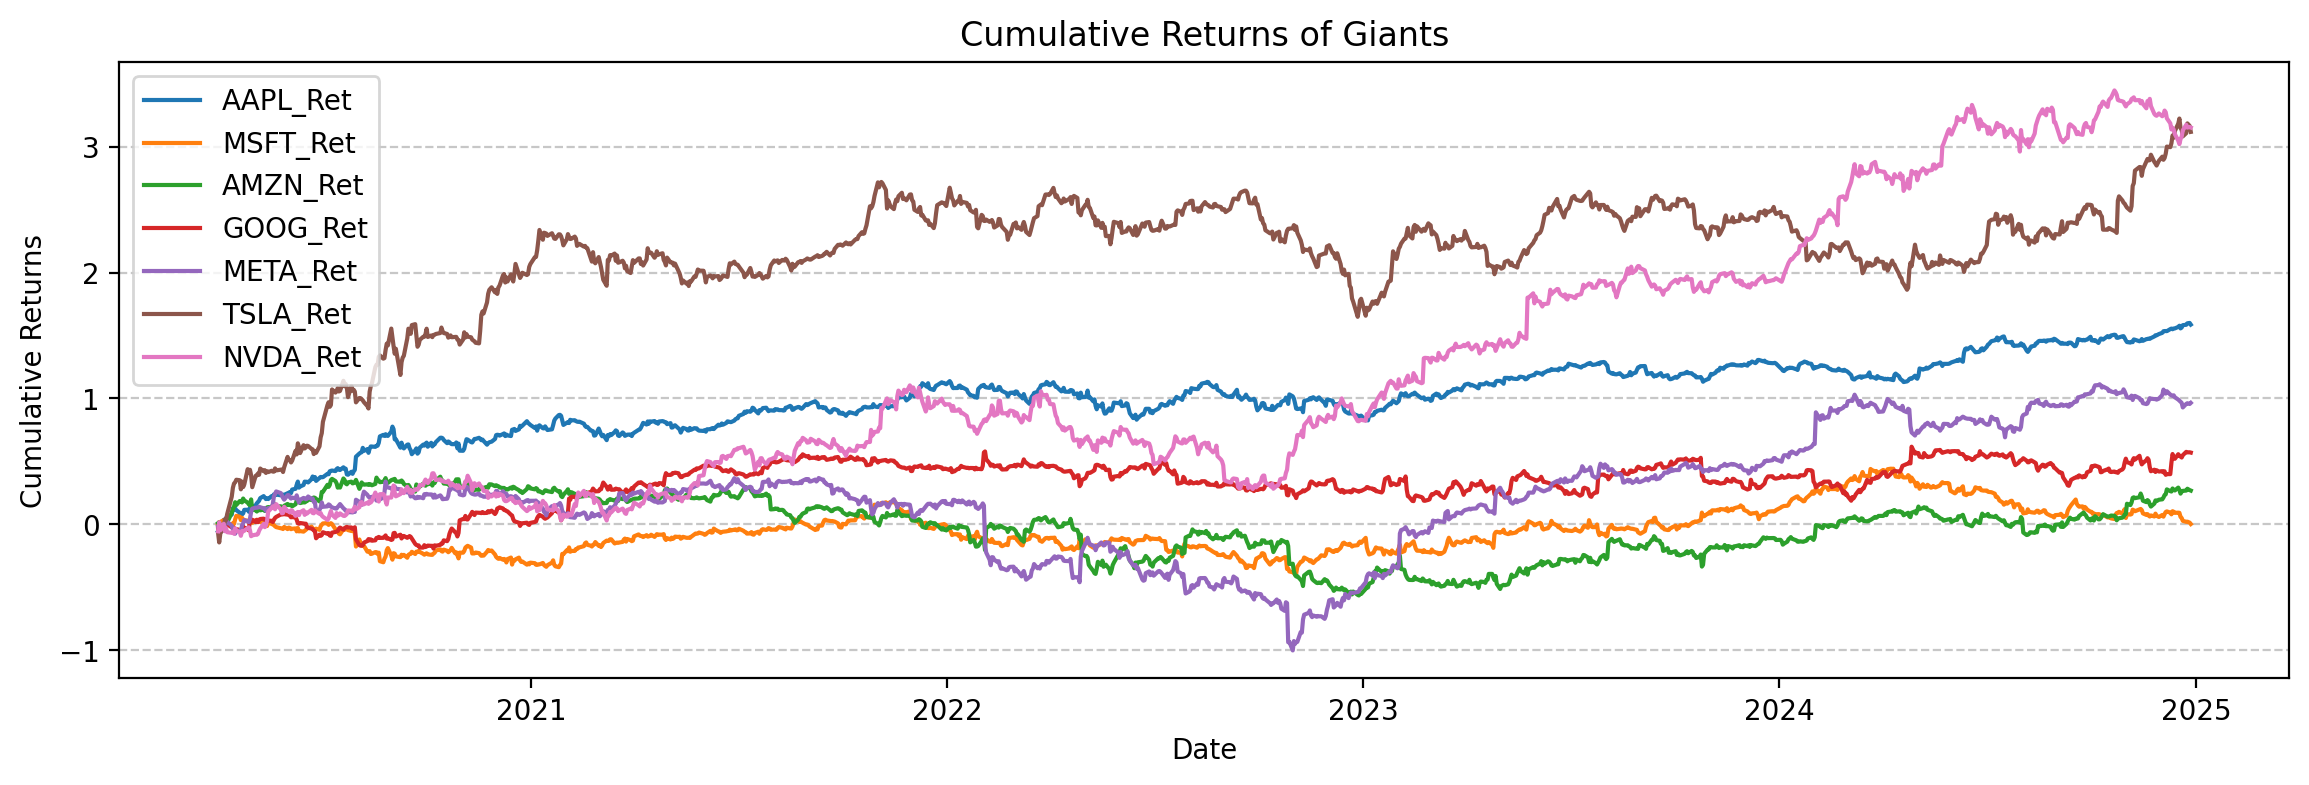

In [ ]:
returns_rotate_2024=returns_rotate[returns_rotate.index>='2024-01-01']
returns_rotate_2024

plt.figure(figsize=(12, 6),dpi=200)
plt.plot(returns_rotate.index, returns_rotate.cumsum())
plt.title("Cumulative Returns of Giants")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(returns_rotate.keys())
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
results = {}
tickers_exclude_tesla=['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META',  'NVDA']
for stock in tickers_exclude_tesla:
    X = sm.add_constant(tsla_2024)  # TSLA return
    y = giant_returns_2024[stock+'_Ret']  # other stock return
    model = sm.OLS(y, X).fit()
    results[stock] = model.params[1]  # tesla return coefficient

print("Tesla's drawdown's impact on other stocks：")
print(pd.Series(results))

Tesla's drawdown's impact on other stocks：
AAPL   -0.000002
MSFT   -0.000006
AMZN    0.000005
GOOG    0.000002
META    0.000007
NVDA   -0.000028
dtype: float64


# Question 2 VAR-X Volatility Model

In [ ]:
rolling_volatility = giant_returns.rolling(window=30).std()
rolling_volatility


,AAPL_Ret,MSFT_Ret,AMZN_Ret,GOOG_Ret,META_Ret,TSLA_Ret,NVDA_Ret
Dates,,,,,,,
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-02-06,0.017701,0.017798,0.014091,0.020455,0.015698,0.036437,0.045798
2025-02-07,0.017893,0.017837,0.015774,0.021205,0.015642,0.033727,0.045828
2025-02-10,0.017859,0.017899,0.015988,0.021248,0.015459,0.033932,0.046159


In [ ]:

from statsmodels.tsa.api import VARMAX

# 确保数据没有缺失值
endog = endog.dropna()
exog = exog.loc[endog.index]  # 对齐外生变量的索引

# 构建VAR-X模型
model = VARMAX(endog, exog=exog, order=(1, 1))  # order=(p, q)，p 是自回归阶数，q 是移动平均阶数
results = model.fit(disp=False)
print(results.summary())